# USED CARS PRICE PREDICTION

In the automotive industry, buying a used car is a common practice due to the cost savings compared to purchasing a new one. However, determining the fair market value of a used car can be challenging, as it depends on various factors such as the car's make, model, year, mileage, condition, and additional features. This problem aims to develop a machine learning model that predicts the price of used cars accurately.



## `Problem Statement : `
We are tasked with creating a predictive model to estimate the selling price of used cars based on historical data. The goal is to provide potential buyers and sellers with a reliable and data-driven estimate of a used car's value, helping them make informed decisions.





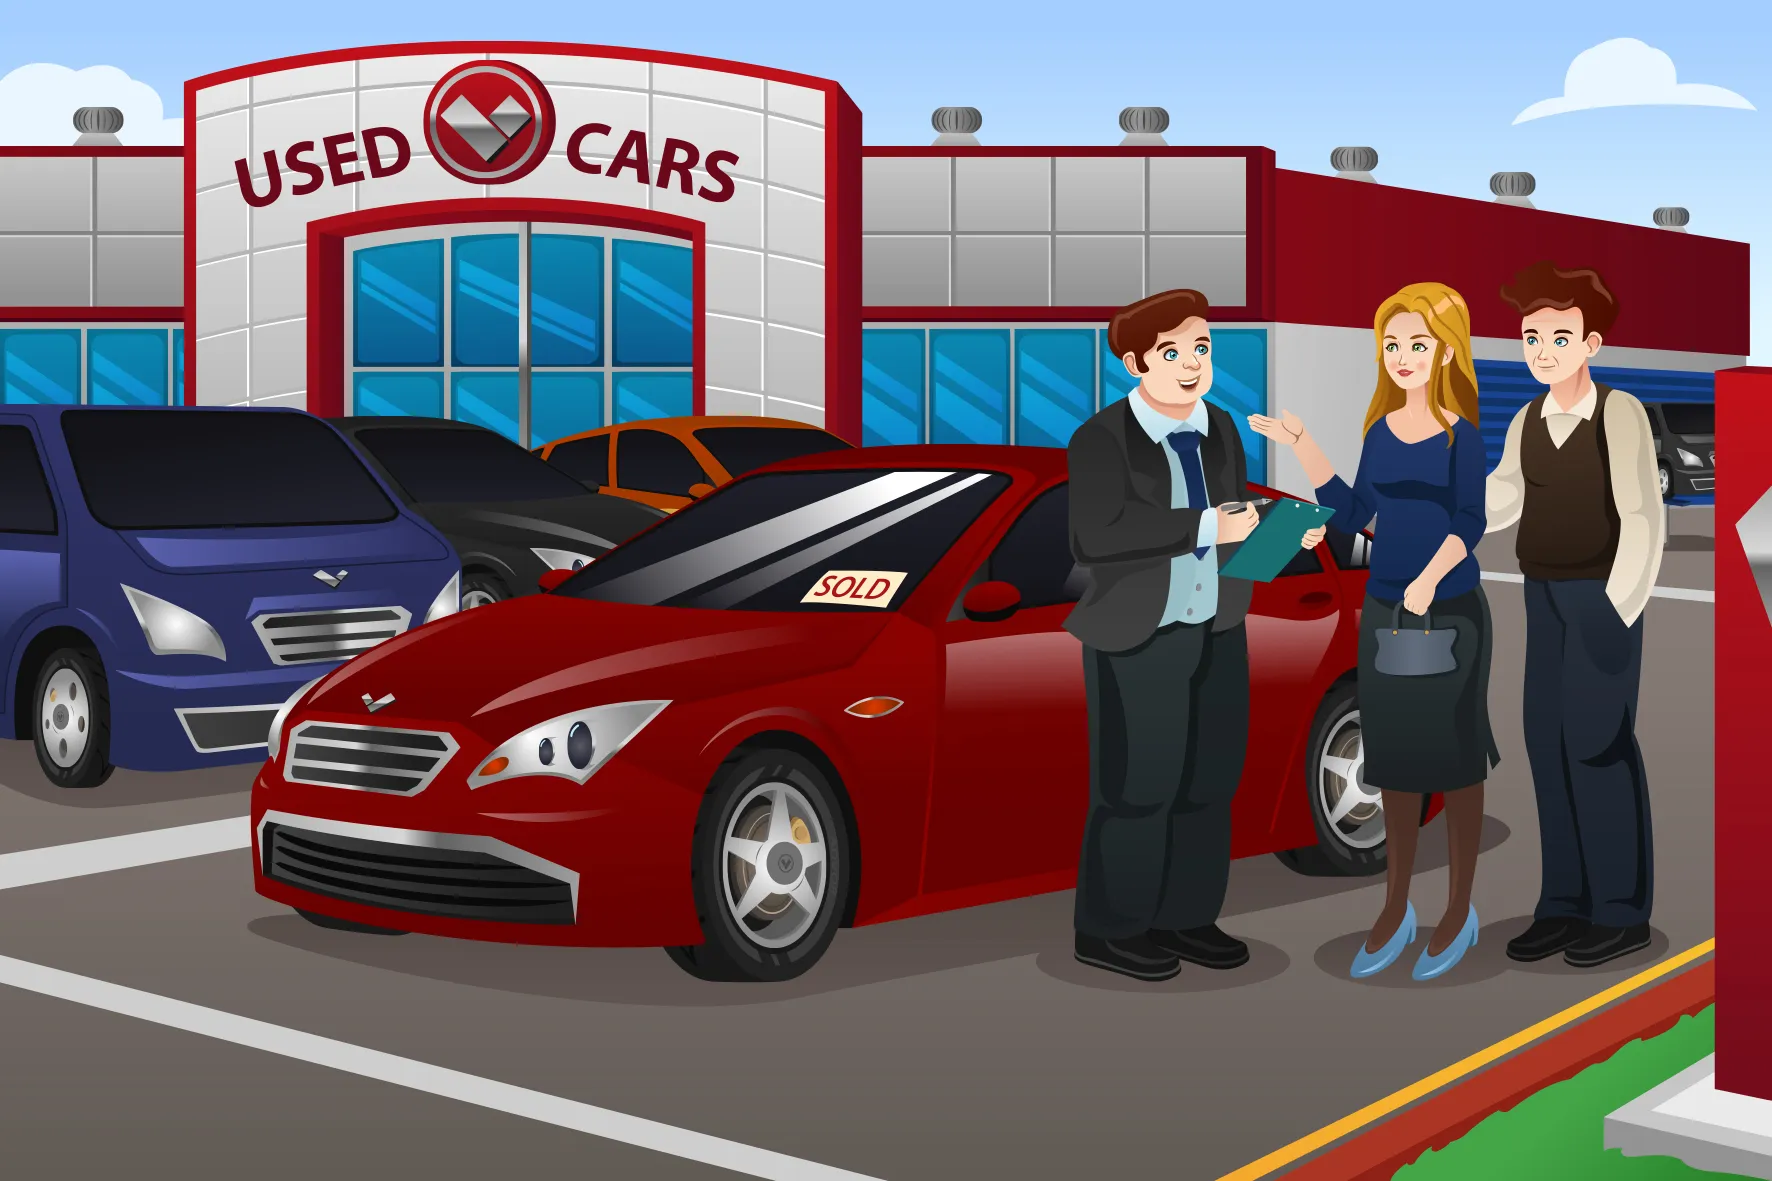

## Data Understanding

In this section we will try to figure out our whole data 

In [3]:
#importing necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns


from matplotlib import style
style.use("ggplot")


import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading data
data = pd.read_csv("/Users/yashikarao/Downloads/vehicles.csv")


In [5]:
print("shape of data is ",data.shape)
data.head()

shape of data is  (426880, 26)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


So our data has **426880** rows and **26** columns

**Data description**

- id : unique id of each entry 
- url : link of each id's
- region : Region o

We will drop some unnecessary features which will not of our intereset and not be helpfull in model fitting

In [6]:
data.drop(['id','url','region_url','VIN','image_url','description','lat','long','posting_date',"title_status"], axis = 1,inplace = True)

**Lets check basic info of data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  county        0 non-null       float64
 15  state         426880 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 52.1+ MB


In [8]:
#Looking for statistical measures of data
data.describe()

,price,year,odometer,county
count,4.268800e+05,425675.000000,4.224800e+05,0.0
mean,7.519903e+04,2011.235191,9.804333e+04,NaN
std,1.218228e+07,9.452120,2.138815e+05,NaN
min,0.000000e+00,1900.000000,0.000000e+00,NaN
25%,5.900000e+03,2008.000000,3.770400e+04,NaN
50%,1.395000e+04,2013.000000,8.554800e+04,NaN
75%,2.648575e+04,2017.000000,1.335425e+05,NaN
max,3.736929e+09,2022.000000,1.000000e+07,NaN


## Data Cleaning

In This Section we will check for ***missing values*** and ***Outliers*** and any irrelevant entry in data for each features. We will also understand each features .

Lets check Missing values first

In [9]:
data.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
county          426880
state                0
dtype: int64

In [10]:
#checking percentage of missing values
(data.isnull().sum()/len(data))*100

region            0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64

So we can see there are missing values in many features.We will deal with them individually later

Lets drop county column as it has 100% missing values

In [11]:
data.drop("county",axis=1,inplace=True)

**Checking for Ourliers in Data**

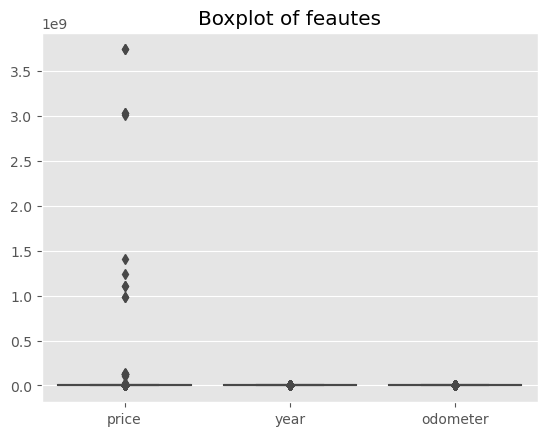

In [12]:
sns.boxplot(data)
plt.title("Boxplot of feautes")
plt.show()

There are outliers present in Data .so we have to be carefull about them.

Now lets look at several features and try to clean them

## **`Checking Numerical Features`** 

- ##  ***`PRICE`*** 

For outliers we'll use **IQR** method to detect them 

In [13]:
data.price.describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

In [14]:
#Getting 25th and 75th percentile
q1 = data.price.quantile(0.25)
q3 = data.price.quantile(0.75)
print('First Quantile(q1) = ',q1,'and Second Quantile(q3) = ',q3)

#IQR Value
IQR = q3-q1

#finding upper and lower limit 
l = q1-1.5*IQR
u = q3+1.5*IQR
print('l = ',l,'u = ',u)


First Quantile(q1) =  5900.0 and Second Quantile(q3) =  26485.75
l =  -24978.625 u =  57364.375


Here we see our lower limit is negative , which means our price of used cars start from $0 which is practically not possible
So checking outliers by seeing percentiles

In [15]:
data.price.describe(percentiles=[0.01,0.05,0.1,0.9,0.99,0.999])

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
1%       0.000000e+00
5%       0.000000e+00
10%      5.000000e+02
50%      1.395000e+04
90%      3.759000e+04
99%      6.699500e+04
99.9%    1.200000e+05
max      3.736929e+09
Name: price, dtype: float64

In [16]:
#10th percentile
p10 = data.price.quantile(0.10)

#99.2th percentile
p992 = data.price.quantile(0.992)

#99 percentile
p99 = data.price.quantile(0.99)

#dropping outliers
data = data[(data.price >= p10)&(data.price <=p992)]

#checking stats
data.price.describe()


count    381371.000000
mean      18723.752016
std       13494.335711
min         500.000000
25%        7696.000000
50%       15590.000000
75%       27590.000000
max       69991.000000
Name: price, dtype: float64

We have deal with our outliers next step is to check **null values** 

In [17]:
data.price.isna().sum()

0

- ## ***`Year`*** 

There is no outlier in year.

Therefore,Dealing with **null values** 

In [18]:
(data.year.isna().sum()/len(data))*100

0.28292659903348705

In year feature only 0.28 percent of data is null. Also imputing with statistical values like mean,mode,median makes no sense 

Therefore dropping these missing values

In [19]:
data.dropna(subset=['year'], inplace = True)
data.year.isna().sum()

0

- ## ***`odometer`*** 

There is no outlier in feature odometer as shown in **boxplot**. But if we check the statistical description of feature odometer, it gives reading of odometer which is practically not possible

In [20]:
round(data.odometer.describe(percentiles=[0,0.1,0.25,0.5,0.75,.9,.99,.999]))

count      378272.0
mean        99277.0
std        192766.0
min             0.0
0%              0.0
10%         15868.0
25%         39359.0
50%         88762.0
75%        136718.0
90%        180000.0
99%        280000.0
99.9%     1111111.0
max      10000000.0
Name: odometer, dtype: float64

In [21]:
#99th percentile
p99 = data.odometer.quantile(0.99)

#indices of outlired data
out_indic =data[data.odometer >= p99].index

#replacing it with valid data entry
data.loc[out_indic,'odometer'] = data.odometer.quantile(0.85)

#verifying stats
data.odometer.describe()


count    378272.00000
mean      92572.74318
std       61042.08125
min           0.00000
25%       39359.00000
50%       88762.00000
75%      136718.00000
max      279974.00000
Name: odometer, dtype: float64

After outlier checking for **missing data** 

In [22]:
data.odometer.isna().sum()/len(data)*100

0.5311707845550262

0.53 % data is missing. Here,instead of dropping we'll impute with mean of values of odometer 

In [23]:
data.odometer.fillna(data.odometer.mean(),inplace = True)
data.odometer.isna().sum()

0

## ***`Categorical Features`*** 

Taking an overview of our categorical features 

In [24]:
col_names = data.columns
col_names

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')

In [25]:
for i in range(0,16) :
    if len(data[col_names[i]].value_counts()) < 100:
        print("Feature =" ,col_names[i],end = "\n")
        print("No_of_unique_val = " ,data[col_names[i]].nunique(),end = "\n")
        print("Values : ",data[col_names[i]].value_counts(),sep = "\n",end = "\n"*3)

        
    

Feature = manufacturer
No_of_unique_val =  42
Values : 
ford               63057
chevrolet          49033
toyota             30862
honda              19408
nissan             16939
jeep               16798
ram                15932
gmc                14926
bmw                13222
dodge              11597
mercedes-benz       9865
hyundai             9130
subaru              8772
volkswagen          8511
lexus               7569
kia                 7309
audi                6959
cadillac            6432
acura               5546
chrysler            5525
buick               5097
mazda               4930
infiniti            4405
lincoln             3976
volvo               3249
mitsubishi          3008
mini                2214
pontiac             2205
jaguar              1870
rover               1855
porsche             1189
mercury             1080
saturn              1060
alfa-romeo           857
tesla                810
fiat                 754
harley-davidson      136
datsun             

IndexError: index 15 is out of bounds for axis 0 with size 15

In [26]:
for i in data.select_dtypes("object").columns:
    print("Unique values in ",i,"are :")
    print(data[i].unique())
    print("*"*60)

Unique values in  region are :
['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 'eastern CT' 'hartford'
 'new haven' 'nor

In [27]:
for i in range(0,26) :
    if len(data[col_names[i]].value_counts()) < 100:
        print("Feature =" ,col_names[i],end = "\n")
        print("No_of_unique_val = " ,data[col_names[i]].nunique(),end = "\n")
        print("Values : ",data[col_names[i]].value_counts(normalize = True),sep = "\n",end = "\n"*3)
    
        print("*"*100)

Feature = manufacturer
No_of_unique_val =  42
Values : 
ford               0.172201
chevrolet          0.133903
toyota             0.084280
honda              0.053001
nissan             0.046258
jeep               0.045873
ram                0.043508
gmc                0.040761
bmw                0.036108
dodge              0.031670
mercedes-benz      0.026940
hyundai            0.024933
subaru             0.023955
volkswagen         0.023243
lexus              0.020670
kia                0.019960
audi               0.019004
cadillac           0.017565
acura              0.015145
chrysler           0.015088
buick              0.013919
mazda              0.013463
infiniti           0.012030
lincoln            0.010858
volvo              0.008873
mitsubishi         0.008214
mini               0.006046
pontiac            0.006022
jaguar             0.005107
rover              0.005066
porsche            0.003247
mercury            0.002949
saturn             0.002895
alfa-romeo         0

IndexError: index 15 is out of bounds for axis 0 with size 15

- ## **`Manufacturer`**  

Dealing Missing Values 

In [28]:
data.manufacturer.isna().sum()/len(data)*100

3.7103068168670394

So around 4 percent of data is missing. Therefore, imputing with mode doesn’t  make large difference 

In [29]:
data.manufacturer.mode()
data.manufacturer.fillna(data.manufacturer.mode()[0],inplace = True)

#Verifying 
data.manufacturer.isna().sum()

0

- ## **`Model`** 

Checking missing data 

In [30]:
data.model.isna().sum()/len(data)*100

1.1346544234430385

Here, 1.22 percent data is missing. We can impute it with mode but that is not feasible as replacing null with frequent model can lead to wrong conclusions. Also,29484 unique values can’t  fit model with such large categories

Therefore,dropping is best option

In [31]:
data.drop('model',axis=1,inplace=True)


- ## **`Condition`**

Checking for null values 

In [32]:
data.condition.isna().sum()/len(data)*100

37.419404036897966

Around **37 percent** of data is null, dropping these missing data will be the dirtiest way. Therefore we have to impute these values. Here, we can’t  impute with mode as it will adversely affect our model as 41 percent data is missing.
So, imputing using **random.choice** with preference probabilities

In [33]:
round(data.condition.value_counts()/len(data),3)

good         0.311
excellent    0.242
like new     0.051
fair         0.017
new          0.002
salvage      0.001
Name: condition, dtype: float64

In [34]:
un_cat = data.condition.unique()
un_cat

array(['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

In [35]:
miss_ind = data[data.condition.isna()].index
data.loc[miss_ind,"condition"]=np.random.choice(un_cat,p=[0.4,0.3,0.1,0,0.1,0.05,0.05],size = len(miss_ind))

In [36]:
#Verifying
data.condition.isna().sum()

0

In [37]:
data.condition.value_counts()

good         175583
excellent    134552
like new      33455
fair          20927
new            8047
salvage        7728
Name: condition, dtype: int64

- ## **`Cylinders`** 

Checking missing values


In [38]:
data.cylinders.isna().sum()/len(data)*100

40.86386250565355

Here, around 42 percent data is missing ,therefore imputing with mode 

In [39]:
data.cylinders.unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [40]:
data.cylinders.mode()

0    6 cylinders
Name: cylinders, dtype: object

In [41]:
data.cylinders = data.cylinders.fillna(data.cylinders.mode()[0])

#Verifying
data.cylinders.isna().sum()

0

- ## **`Fuel`** 

Null Values 

In [42]:
data.fuel.isna().sum()/len(data)*100

0.6105834464043419

0.64 percent of fuel values is missing, instead of dropping ,imputing it with mode 

In [43]:
data.fuel = data.fuel.fillna(data.fuel.mode()[0])

#Verifying
data.fuel.isna().sum()

0

- ## **`Transmission`** 

Null Values 

In [44]:
data.transmission.isna().sum()/len(data)*100

0.4585949743881018

Only o.6 percent data is missing,imputing it with mode

In [45]:
data.transmission.unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [46]:
data.transmission.fillna(data.transmission.mode()[0],inplace = True)

#Verifying
data.transmission.isna().sum()

0

- ## **`Drive`** 

Treating Missing Data

In [47]:
data.drive.isna().sum()/len(data)*100

30.56993047447751

Around 31 percent of data is missing

In [48]:
data.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [49]:
data.drive.fillna(data.drive.mode()[0],inplace = True)

#Verifying
data.drive.isna().sum()

0

- ## **`Size`** 

Checking missing values

In [50]:
data["size"].isna().sum()/len(data)*100

71.6920156090583

Here,72 percent of data is missing ,imputing with statistical method losses originality of data.
Therefore,dropping the column is the best option

In [51]:
data.drop('size',axis = 1,inplace = True)

- ## **`Type`** 

In [52]:
#null values
data.type.isna().sum()/len(data)*100

21.653624057303336

22 percent of data is missing. Imputing here with mode is not feasible ,therefore using random.choice with probabilities to impute

In [53]:
round(data.type.value_counts()/len(data),3)

sedan          0.204
SUV            0.179
pickup         0.106
truck          0.077
other          0.051
coupe          0.046
hatchback      0.041
wagon          0.026
van            0.020
convertible    0.019
mini-van       0.012
offroad        0.002
bus            0.001
Name: type, dtype: float64

In [54]:
un_cat = data.type.unique()
un_cat

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'convertible', 'wagon',
       'van'], dtype=object)

In [55]:
miss_ind = data[data.type.isna()].index

In [56]:
data.loc[miss_ind,"type"]=np.random.choice(un_cat,p=[0.15,0.1,0,0,0.05,0.2,0.05,0,0.3,0,0,0.05,0.05,0.05],size = len(miss_ind))

In [57]:
#Verifying
data.type.isna().sum()

0

- ## **`paint_color`** 

In [58]:
#null_values
data.paint_color.isna().sum()/len(data)*100

29.041631167629085

Here,around 31 percent of data values are missing in paint_color,imputing randomnly

In [59]:
data.paint_color.value_counts()

white     70817
black     56969
silver    39252
blue      28847
red       28230
grey      22074
green      6929
custom     6188
brown      6092
yellow     1981
orange     1809
purple      661
Name: paint_color, dtype: int64

In [60]:
u_cat=data.paint_color.unique()

In [61]:
missing_indices = data[data["paint_color"].isna()].index

In [62]:
np.random.choice(u_cat,len(missing_indices))

array(['purple', nan, 'red', ..., 'purple', 'purple', 'brown'],
      dtype=object)

In [63]:
data.loc[missing_indices,"paint_color"] = np.random.choice(u_cat,len(missing_indices))

In [64]:
#Verifying
data.paint_color.isnull().sum()

8470

# **`FEATURE ENGINEERING`**

In [65]:
data['odometer'] = data['odometer'].astype(int)

In [66]:
data['year'] = data['year'].astype(int)

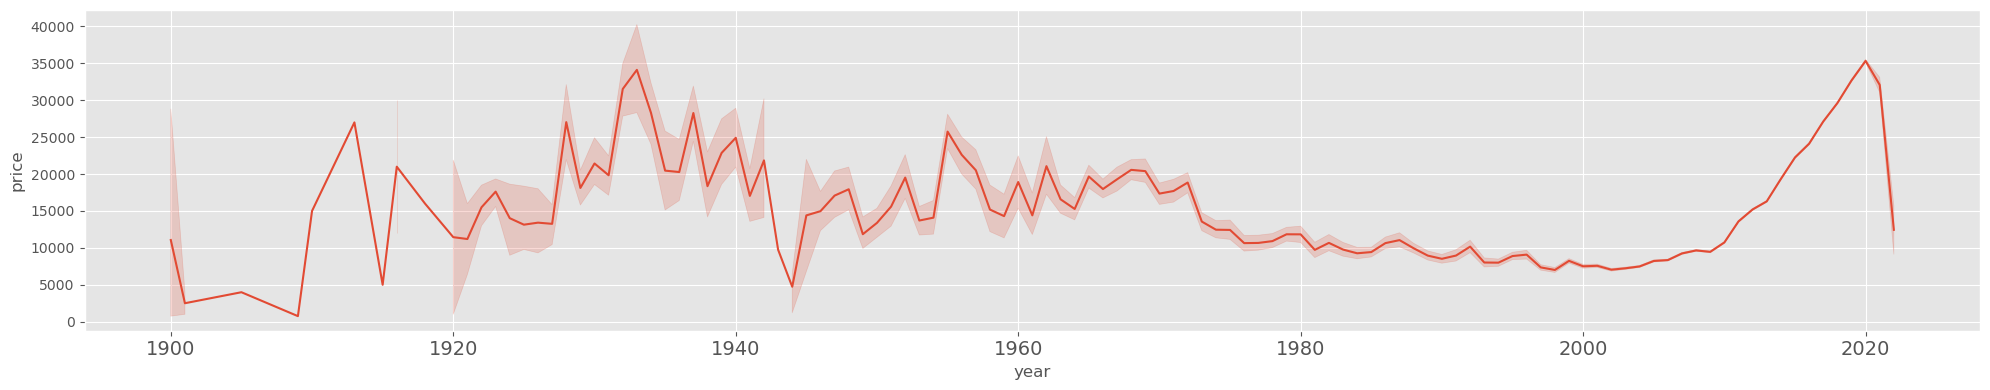

In [67]:
plt.figure(figsize=(20,4))
sns.lineplot(x=data['year'], y=data['price'])
plt.xticks(fontsize=14)
plt.tight_layout()
plt.show()

In [68]:
data = data[data.year >= 1997]

<Axes: xlabel='state'>

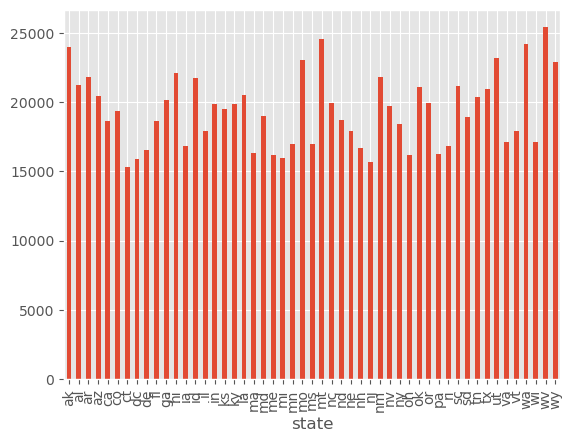

In [69]:
data.groupby("state").price.agg('mean').plot(kind = 'bar')

In [70]:
data.drop('region',axis = 1,inplace = True)

In [71]:
data['car_age'] = 2023 - data['year']
data.drop(['year'], axis = 1, inplace = True)

In [72]:
data.shape

(362804, 12)

In [73]:
data.describe()

,price,odometer,car_age
count,362804.000000,362804.000000,362804.000000
mean,18961.291877,92628.534164,10.481836
std,13459.908846,60620.405454,5.364512
min,500.000000,0.000000,1.000000
25%,7950.000000,39647.000000,6.000000
50%,15990.000000,89351.000000,9.000000
75%,27990.000000,136290.500000,14.000000
max,69991.000000,279974.000000,26.000000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362804 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         362804 non-null  int64 
 1   manufacturer  362804 non-null  object
 2   condition     362804 non-null  object
 3   cylinders     362804 non-null  object
 4   fuel          362804 non-null  object
 5   odometer      362804 non-null  int64 
 6   transmission  362804 non-null  object
 7   drive         362804 non-null  object
 8   type          362804 non-null  object
 9   paint_color   354787 non-null  object
 10  state         362804 non-null  object
 11  car_age       362804 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 36.0+ MB


In [75]:
data = data.reset_index()
data.drop('index',axis = 1,inplace = True)
data.head()

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,car_age
0,33590,gmc,good,8 cylinders,gas,57923,other,4wd,pickup,white,al,9
1,22590,chevrolet,good,8 cylinders,gas,71229,other,4wd,pickup,blue,al,13
2,39590,chevrolet,good,8 cylinders,gas,19160,other,4wd,pickup,red,al,3
3,30990,toyota,good,8 cylinders,gas,41124,other,4wd,pickup,red,al,6
4,15000,ford,excellent,6 cylinders,gas,128000,automatic,rwd,truck,black,al,10


In [76]:
data.columns

Index(['price', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state', 'car_age'],
      dtype='object')

In [77]:
data[['fuel','price']].groupby('fuel').mean().sort_values('price',ascending=False)

,price
fuel,
diesel,32170.579094
other,27926.775658
electric,25208.607603
gas,17182.917922
hybrid,15711.561433


In [78]:
data[['manufacturer','price']].groupby('manufacturer').mean().sort_values('price',ascending=False).head(15)

,price
manufacturer,
tesla,38450.171605
aston-martin,34240.230769
alfa-romeo,30117.324487
ram,29960.756180
porsche,29126.844180
jaguar,28302.058857
rover,26955.437222
gmc,24864.852139
audi,24840.173118


In [79]:
data[['condition','price']].groupby('condition').mean().sort_values('price',ascending=False)

,price
condition,
good,20979.301241
new,20348.614988
like new,19060.307494
salvage,18719.560472
excellent,16711.181351
fair,15649.652127


In [80]:
data[['cylinders','price']].groupby('cylinders').mean().sort_values('price',ascending=False)

,price
cylinders,
12 cylinders,28113.420168
8 cylinders,24027.756098
10 cylinders,21254.580734
other,20716.713326
6 cylinders,19947.954400
3 cylinders,13994.697959
4 cylinders,11506.302010
5 cylinders,7819.249049


In [81]:
for i in ['transmission', 'drive', 'type', 'paint_color', 'state']:
    print(data[[i,'price']].groupby(i).mean().sort_values('price',ascending=False).head(15) ,end = '\n_________________________________\n')

                     price
transmission              
other         28376.981687
automatic     17232.064695
manual        14609.782624
_________________________________
              price
drive              
rwd    21531.549142
4wd    21028.832851
fwd    12782.834110
_________________________________
                    price
type                     
other        27319.031741
pickup       25696.777840
truck        24630.932143
coupe        21085.970921
offroad      18572.918635
convertible  17636.518892
van          17617.254164
SUV          17384.012387
hatchback    15416.225646
bus          15213.648780
wagon        14793.288195
sedan        14766.028452
mini-van      9843.772166
_________________________________
                    price
paint_color              
white        21966.038438
black        21094.884932
red          19170.545077
orange       18167.621989
yellow       17831.038794
purple       17417.795003
blue         17317.604860
brown        17301.004570
custom       

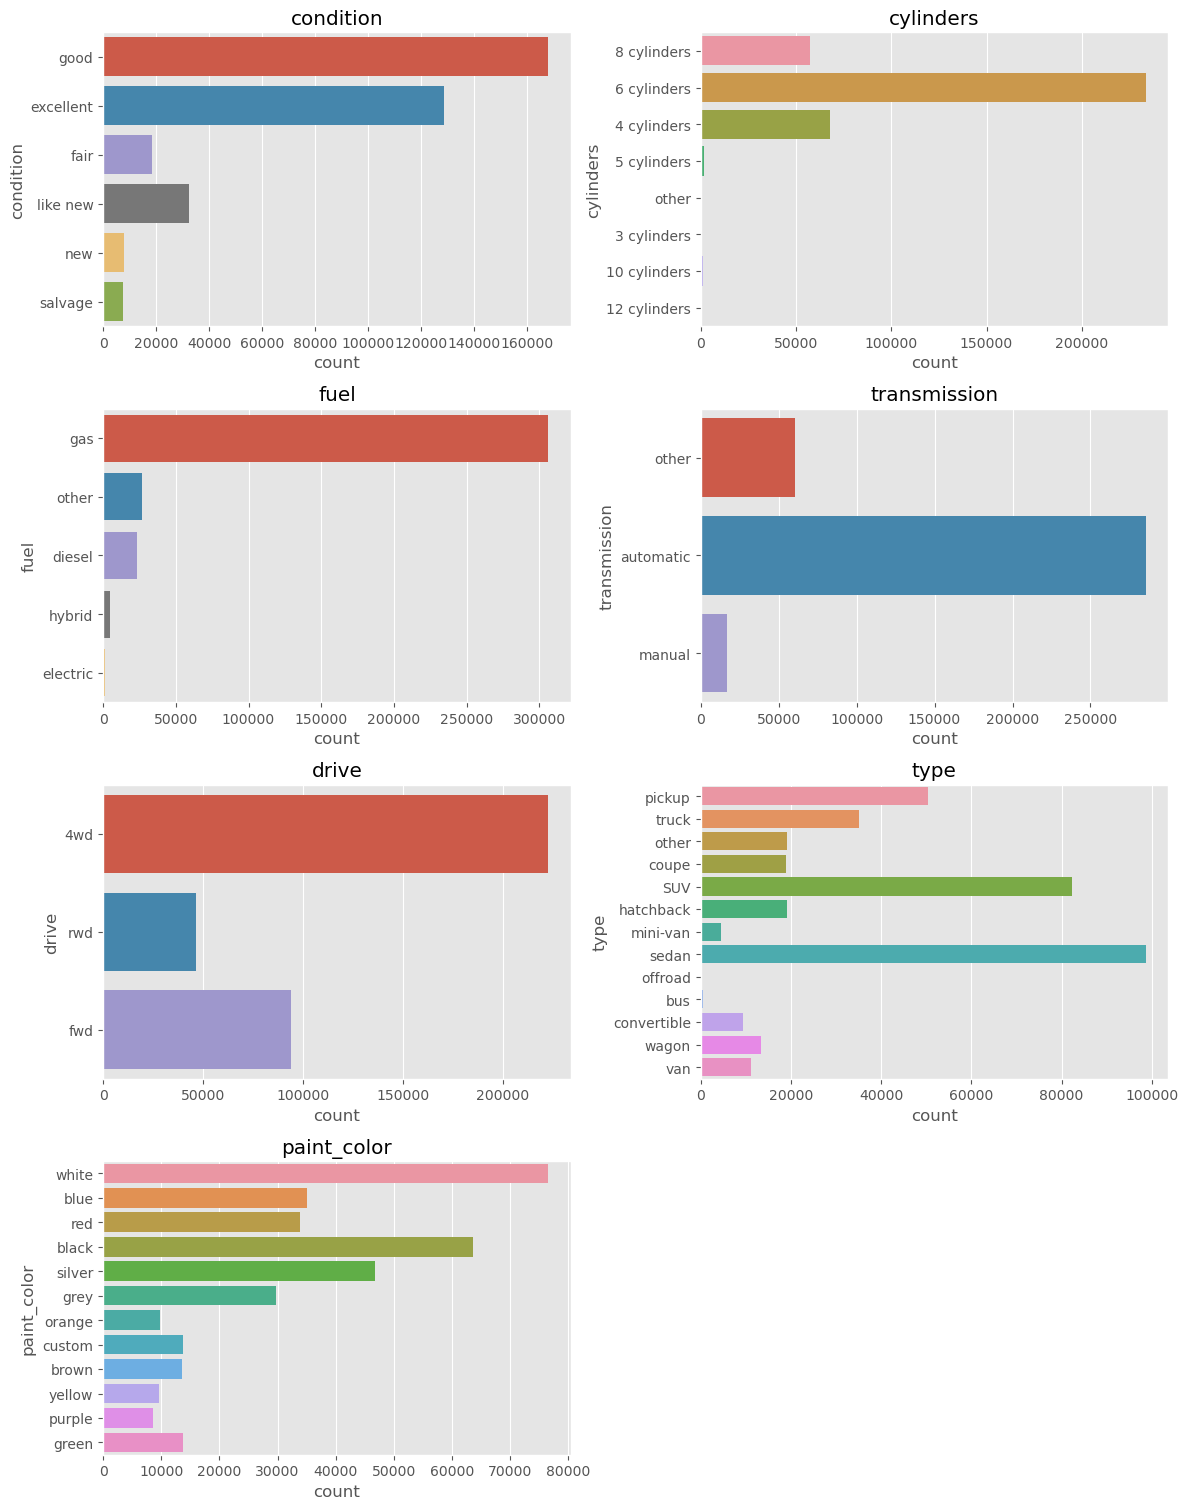

In [82]:
columns = [ 'condition', 'cylinders', 'fuel','transmission', 'drive', 'type', 'paint_color']

plt.figure(figsize=(12,90))
for i,col in enumerate(columns):
    axes = plt.subplot(24,2,i + 1)
    sns.countplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

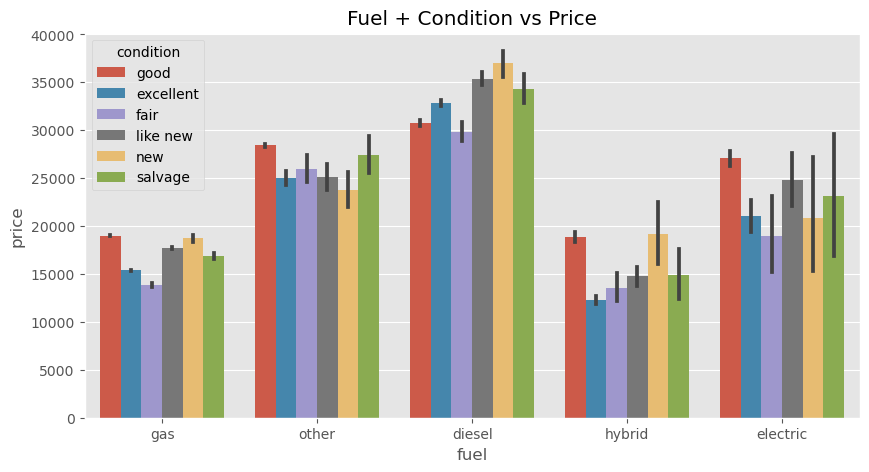

In [83]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=data)
plt.title('Fuel + Condition vs Price')
plt.savefig('Insight-Figure-2',dpi=None)
plt.show()

<Axes: xlabel='price', ylabel='Density'>

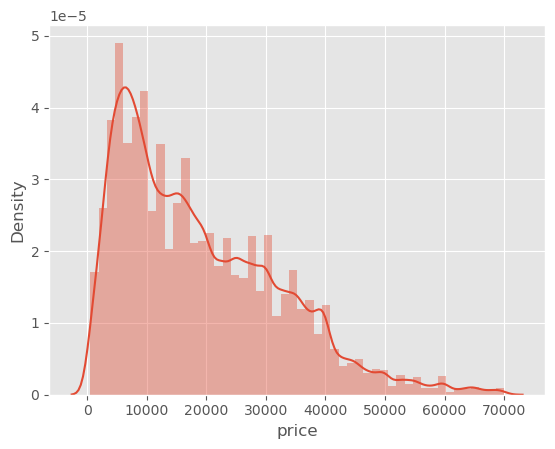

In [84]:
sns.distplot(data.price)

<Axes: >

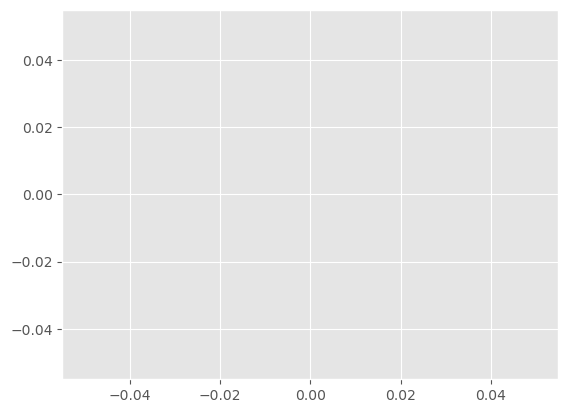

In [85]:
sns.distplot()

In [86]:
import math

<Axes: ylabel='Density'>

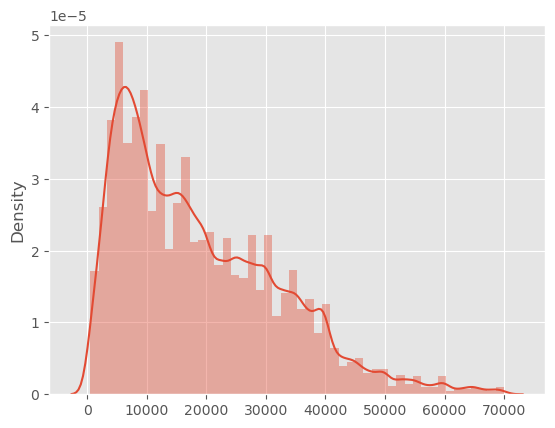

In [87]:
sns.distplot(x=data.price)

<Axes: ylabel='Density'>

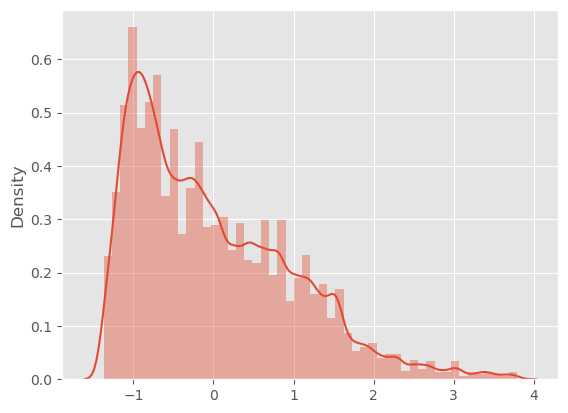

In [88]:
sns.distplot(x=((data.price - data.price.mean())/data.price.std()))

<Axes: xlabel='car_age', ylabel='Density'>

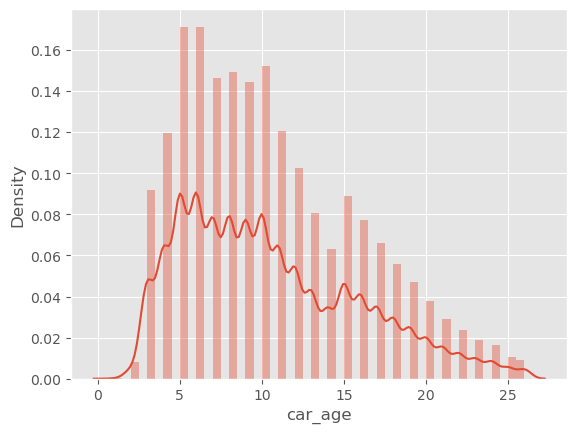

In [89]:
sns.distplot(data.car_age)

<Axes: xlabel='price', ylabel='Density'>

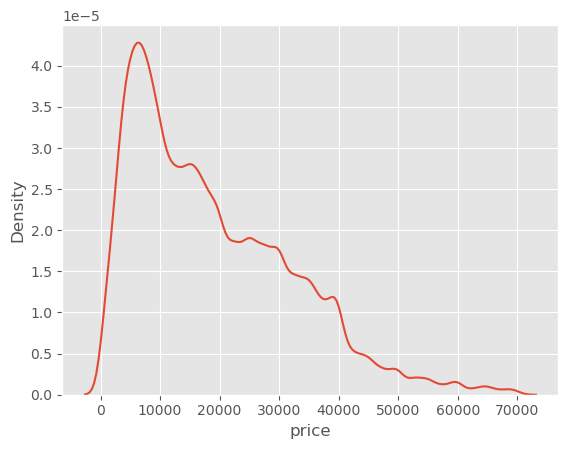

In [90]:
sns.kdeplot(data.price)

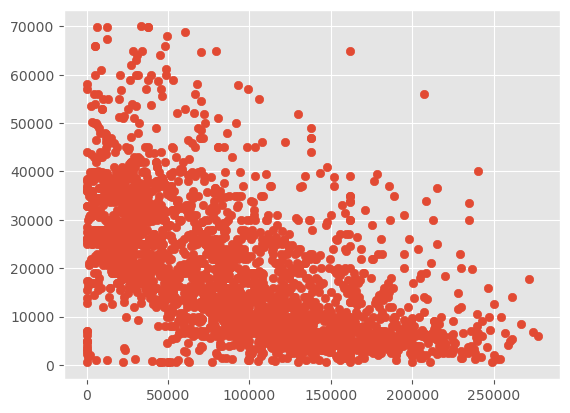

In [91]:
samp_data = data.sample(2500)
plt.scatter(samp_data.odometer,samp_data.price)
plt.show()

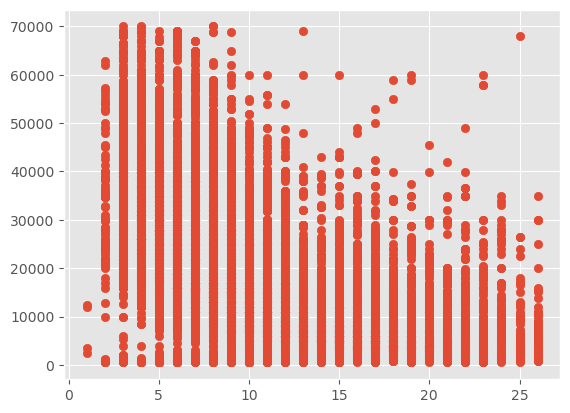

In [92]:
samp_data = data.sample(20000)
plt.scatter(samp_data.car_age,samp_data.price)
plt.show()

<Axes: >

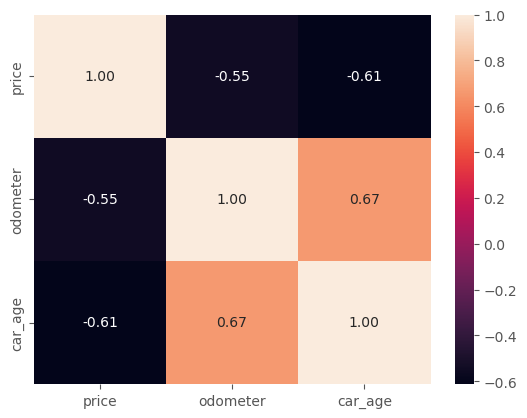

In [93]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [94]:
data.head()

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,car_age
0,33590,gmc,good,8 cylinders,gas,57923,other,4wd,pickup,white,al,9
1,22590,chevrolet,good,8 cylinders,gas,71229,other,4wd,pickup,blue,al,13
2,39590,chevrolet,good,8 cylinders,gas,19160,other,4wd,pickup,red,al,3
3,30990,toyota,good,8 cylinders,gas,41124,other,4wd,pickup,red,al,6
4,15000,ford,excellent,6 cylinders,gas,128000,automatic,rwd,truck,black,al,10


# Model Evaluation

### One Hot Encoding

In [95]:
df=pd.get_dummies(data,drop_first=True)

In [96]:
print(df.shape)
df.head()

(362804, 136)


,price,odometer,car_age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,33590,57923,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22590,71229,13,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,39590,19160,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,30990,41124,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15000,128000,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
#splitting the data into dependent and independent variable

x=df.drop("price",axis=1)
y=df["price"]
print(x.shape)
print(y.shape)


(362804, 135)
(362804,)


In [98]:
#lets split the data into training part and vALIDATING PART
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

print(x_train.shape)
print(x_test.shape)

(290243, 135)
(72561, 135)


In [99]:
#lets scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [100]:
#fitting the model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics

x_train=sm.add_constant(x_train)
model1=sm.OLS(y_train,x_train).fit()




In [101]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     4503.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:21:17   Log-Likelihood:            -3.0076e+06
No. Observations:              290243   AIC:                         6.015e+06
Df Residuals:                  290107   BIC:                         6.017e+06
Df Model:                         135                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.897e+04     14.215   1334.597      0.000    1.89e+04     1.9e+04
x1         -3643.0615     20.727   -175.765      0.000   -3683.686   -3602.437
x2         -6123.0714     20.378   -300.473      0.000   -6163.012   -6083.131
x3            62.0857     15.370      4.039      0.000      31.961      92.210
x4           -12.7032     14.609     -0.870      0.385     -41.336      15.930
x5           277.9333     21.249     13.080      0.000     236.286     319.581
x6           -94.7624     26.101     -3.631      0.000    -145.921     -43.604
x7          -350.5549     19.346    -18.120      0.000    -388.473    -312.636
x8           -15.2811     20.555     -0.743      0.457     -55.569      25.007
x9          -348.6461     41.025     -8.498      0.000    -429.054    -268.238
x10         -517.3490     20.075    -25.770      0.000    -556.696    -478.002
x11         -633.0463     24.693    -25.636      0.000    -681.445    -584.648
x12         -108.8682     14.227     -7.652      0.000    -136.753     -80.983
x13         -428.4999     15.209    -28.175      0.000    -458.308    -398.691
x14         -375.0500     48.571     -7.722      0.000    -470.248    -279.852
x15          218.4854     26.983      8.097      0.000     165.600     271.371
x16         -137.2005     14.407     -9.523      0.000    -165.437    -108.964
x17         -314.1914     29.682    -10.585      0.000    -372.368    -256.015
x18         -882.7145     22.999    -38.380      0.000    -927.793    -837.636
x19         -103.3456     19.050     -5.425      0.000    -140.683     -66.008
x20          102.7463     16.386      6.270      0.000      70.630     134.863
x21          -35.6776     27.787     -1.284      0.199     -90.140      18.785
x22         -885.2239     21.672    -40.846      0.000    -927.701    -842.747
x23          -15.0224     14.233     -1.055      0.291     -42.919      12.874
x24          431.3619     21.796     19.791      0.000     388.643     474.081
x25          -16.7236     18.374     -0.910      0.363     -52.736      19.288
x26         -458.9753     19.516    -23.518      0.000    -497.226    -420.724
x27          183.8645     23.377      7.865      0.000     138.047     229.682
x28         -141.6324     15.354     -9.225      0.000    -171.725    -111.540
x29         -242.5996     17.093    -14.193      0.000    -276.102    -209.097
x30         -611.6532     17.633    -34.689      0.000    -646.213    -577.094
x31          -37.1704     14.221     -2.614      0.009     -65.042      -9.298
x32        -1019.4371     28.126    -36.246      0.000   -1074.563    -964.311
x33          -62.1176     16.427     -3.781      0.000     -94.314     -29.922
x34          528.6417     15.595     33.898      0.000     498.076     559.207
x35          222.8071     28.309      7.871      0.000     167.323     278.291
x3

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_score(data):
    dic={}
    dic['columns']=data.columns
    dic["vif"]=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    return pd.DataFrame(dic)

In [103]:
vif_score(x.sample(10000))

,columns,vif
0,odometer,7.200289
1,car_age,9.900750
2,manufacturer_alfa-romeo,1.179484
3,manufacturer_aston-martin,1.016298
4,manufacturer_audi,2.115040
...,...,...
130,state_vt,1.568411
131,state_wa,3.593858
132,state_wi,3.593723
133,state_wv,1.182448


In [104]:
vif_score(x.drop(["manufacturer_chevrolet","manufacturer_ford","cylinders_6 cylinders",'cylinders_4 cylinders','cylinders_8 cylinders',
                  'fuel_gas','state_ca','state_fl'],axis=1).sample(10000))

,columns,vif
0,odometer,6.836010
1,car_age,9.167514
2,manufacturer_alfa-romeo,1.034005
3,manufacturer_aston-martin,NaN
4,manufacturer_audi,1.095637
...,...,...
122,state_vt,1.032990
123,state_wa,1.158138
124,state_wi,1.120951
125,state_wv,1.016778


In [105]:
vif_score(x.drop(["manufacturer_chevrolet","manufacturer_ford","cylinders_6 cylinders",'cylinders_4 cylinders','cylinders_8 cylinders',
                  'fuel_gas','state_ca','state_fl',"odometer"],axis=1).sample(10000))

,columns,vif
0,car_age,4.906979
1,manufacturer_alfa-romeo,1.032241
2,manufacturer_aston-martin,1.206106
3,manufacturer_audi,1.085852
4,manufacturer_bmw,1.150774
...,...,...
121,state_vt,1.025434
122,state_wa,1.164118
123,state_wi,1.130040
124,state_wv,1.027866


In [106]:
#makig model2 after removing multicollinearity
x=x.drop(["manufacturer_chevrolet","manufacturer_ford","cylinders_6 cylinders",'cylinders_4 cylinders','cylinders_8 cylinders',
                  'fuel_gas','state_ca','state_fl',"odometer"],axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)
model2=sm.OLS(y_train,x_train).fit()

In [107]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                              7420.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                        0.00
Time:                        17:22:35   Log-Likelihood:                     -3.1211e+06
No. Observations:              290243   AIC:                                  6.243e+06
Df Residuals:                  290117   BIC:                                  6.244e+06
Df Model:                         126                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
car_age                       -754.6208      3.919   -192.555      0.000    -762.302    -746.940
manufacturer_alfa-romeo       8409.2210    450.548     18.664      0.000    7526.160    9292.282
manufacturer_aston-martin     5208.7187   3504.966      1.486      0.137   -1660.917    1.21e+04
manufacturer_audi             1.007e+04    158.875     63.394      0.000    9760.395    1.04e+04
manufacturer_bmw              6997.8689    118.153     59.227      0.000    6766.293    7229.445
manufacturer_buick            2604.7900    188.061     13.851      0.000    2236.196    2973.384
manufacturer_cadillac         8114.2362    166.712     48.672      0.000    7787.486    8440.986
manufacturer_chrysler         -661.9616    181.103     -3.655      0.000   -1016.918    -307.005
manufacturer_dodge            2373.2753    127.316     18.641      0.000    2123.740    2622.810
manufacturer_ferrari          -2.44e+04   6541.967     -3.730      0.000   -3.72e+04   -1.16e+04
manufacturer_fiat            -4577.6524    476.465     -9.608      0.000   -5511.511   -3643.793
manufacturer_gmc              7875.7867    111.985     70.329      0.000    7656.300    8095.273
manufacturer_harley-davidson  3267.1199   1134.806      2.879      0.004    1042.931    5491.309
manufacturer_honda            1913.9663    101.138     18.924      0.000    1715.739    2112.193
manufacturer_hyundai          -273.6502    139.676     -1.959      0.050    -547.411       0.110
manufacturer_infiniti         6247.2010    195.224     32.000      0.000    5864.568    6629.834
manufacturer_jaguar           9761.8142    304.472     32.061      0.000    9165.057    1.04e+04
manufacturer_jeep             9029.1213    108.215     83.437      0.000    8817.022    9241.220
manufacturer_kia               -97.0341    154.837     -0.627      0.531    -400.510     206.441
manufacturer_land rover       3371.9785   4005.768      0.842      0.400   -4479.215    1.12e+04
manufacturer_lexus            9123.2396    151.799     60.101      0.000    8825.718    9420.761
manufacturer_lincoln          7170.8384    210.573     34.054      0.000    6758.121    7583.555
manufacturer_mazda              35.0269    187.661      0.187      0.852    -332.783     402.837
manufacturer_mercedes-benz    9957.3640    137.307     72.519      0.000    9688.246    1.02e+04
manufacturer_mercury         -1042.9683    432.951     -2.409      0.016   -1891.540    -194.397
manufacturer_mini             1605.2894    278.584      5.762      0.000    1059.272    2151.307
manufacturer_mitsubishi       -709.4169    239.928     -2.957      0.003   -1179.669    -239.165
manufacturer_morgan          -1.844e+04   1.13e+04     -1.628      0.104  

In [108]:
model2=sm.OLS(y_train,x_train).fit()

In [109]:
#lets make final_model

lr=LinearRegression()
lr.fit(x_train,y_train)
print("Training score :",lr.score(x_train,y_train))
print("testing score :",lr.score(x_test,y_test))

Training score : 0.5803025412990219
testing score : 0.5789811992286554


**Calculating error metrics**

In [110]:
y_pred=lr.predict(x_test)


In [115]:
R2_score = r2_score(y_test, y_pred)*100
score_lr = result(y_test, y_pred)
score_data['Linear Regression'] = score_lr
print('R2_score: ', score_lr[0])
print('Mean squared error: ', score_lr[2])
print('Mean absolute error: ', score_lr[3])
print('Root mean squared error: ', score_lr[4])

R2_score:  0.5790
Mean squared error:  75769126.97
Mean absolute error:  6260.53
Root mean squared error:  8704.55


In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error

In [112]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % r2_score(y_test,y_pred))
    r.append('%.4f' % (r2_score(y_test,y_pred)*100))
    r.append('%.2f' % mean_squared_error(y_test, y_pred))
    r.append('%.2f' % mean_absolute_error(y_test, y_pred))
    r.append('%.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    
    return (r)

In [113]:
score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

In [116]:
R2_score

57.89811992286554